# Table of Contents
 <p><div class="lev1"><a href="#Plotting-graphs-with-Python"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plotting graphs with Python</a></div><div class="lev1"><a href="#Using-the-wrapper"><span class="toc-item-num">2&nbsp;&nbsp;</span>Using the wrapper</a></div><div class="lev1"><a href="#Quiz"><span class="toc-item-num">3&nbsp;&nbsp;</span>Quiz</a></div><div class="lev2"><a href="#Plot-Height"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Plot Height</a></div><div class="lev2"><a href="#Most-Common-Weight"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Most Common Weight</a></div><div class="lev2"><a href="#Height-vs-Weight"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Height vs Weight</a></div><div class="lev2"><a href="#Barchart"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Barchart</a></div><div class="lev2"><a href="#Wages"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Wages</a></div><div class="lev2"><a href="#Wage-Barchart"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Wage Barchart</a></div><div class="lev2"><a href="#Most-Common-Age"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Most Common Age</a></div>

# Plotting graphs with Python

- https://www.udacity.com/wiki/plotting-graphs-with-python

In [1]:
%%writefile plotting.py

from matplotlib import pyplot
from numpy import arange
import bisect

def scatterplot(x,y):
    pyplot.plot(x,y,'b.')
    pyplot.xlim(min(x)-1,max(x)+1)
    pyplot.ylim(min(y)-1,max(y)+1)
    pyplot.show()

def barplot(labels,data):
    pos=arange(len(data))
    pyplot.xticks(pos+0.4,labels)
    pyplot.bar(pos,data)
    pyplot.show()

def histplot(data,bins=None,nbins=5):
    minx,maxx=min(data),max(data)
    space=(maxx-minx)/float(nbins)
    if not bins: bins=arange(minx,maxx,space)
    binned=[bisect.bisect(bins,x) for x in data]
    l=['%.1f'%x for x in list(bins)+[maxx]] if space<1 else [str(int(x)) for x in list(bins)+[maxx]]
    displab=[x+'-'+y for x,y in zip(l[:-1],l[1:])]
    barplot(displab,[binned.count(x+1) for x in range(len(bins))])

def barchart(x,y,numbins=5):
    datarange=max(x)-min(x)
    bin_width=float(datarange)/numbins
    pos=min(x)
    bins=[0 for i in range(numbins+1)]

    for i in range(numbins):
        bins[i]=pos
        pos+=bin_width
    bins[numbins]=max(x)+1
    binsum=[0 for i in range(numbins)]
    bincount=[0 for i in range(numbins)]
    binaverage=[0 for i in range(numbins)]

    for i in range(numbins):
        for j in range(len(x)):
            if x[j]>=bins[i] and x[j]<bins[i+1]:
                bincount[i]+=1
                binsum[i]+=y[j]

    for i in range(numbins):
        binaverage[i]=float(binsum[i])/bincount[i]
    barplot(range(numbins),binaverage)

def piechart(labels,data):
    fig=pyplot.figure(figsize=(7,7))
    pyplot.pie(data,labels=labels,autopct='%1.2f%%')
    pyplot.show()

Writing plotting.py


# Using the wrapper

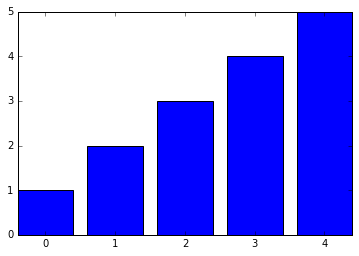

In [3]:
%matplotlib inline
from plotting import *

barchart([1, 2, 3, 4, 5], [1, 2, 3, 4, 5], 5)

# Quiz 

## Plot Height

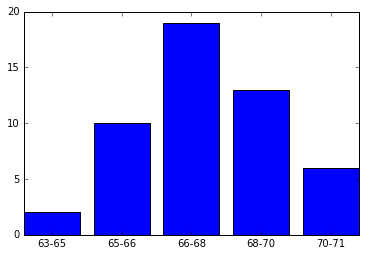

In [4]:
#Plot a histogram of Height using the histplot function
from plotting import *

Height=[65.78, 71.52, 69.4, 68.22, 67.79, 68.7, 69.8, 70.01, 67.9, 66.78,
 66.49, 67.62, 68.3, 67.12, 68.28, 71.09, 66.46, 68.65, 71.23, 67.13, 67.83, 
68.88, 63.48, 68.42, 67.63, 67.21, 70.84, 67.49, 66.53, 65.44, 69.52, 65.81, 
67.82, 70.6, 71.8, 69.21, 66.8, 67.66, 67.81, 64.05, 68.57, 65.18, 69.66, 67.97, 
65.98, 68.67, 66.88, 67.7, 69.82, 69.09]

Weight=[112.99, 136.49, 153.03, 142.34, 144.3, 123.3, 141.49, 136.46, 
112.37, 120.67, 127.45, 114.14, 125.61, 122.46, 116.09, 140.0, 129.5, 142.97, 
137.9, 124.04, 141.28, 143.54, 97.9, 129.5, 141.85, 129.72, 142.42, 131.55, 
108.33, 113.89, 103.3, 120.75, 125.79, 136.22, 140.1, 128.75, 141.8, 121.23, 
131.35, 106.71, 124.36, 124.86, 139.67, 137.37, 106.45, 128.76, 145.68, 116.82, 
143.62, 134.93]

#Insert your code on the next line
histplot(Height)

## Most Common Weight

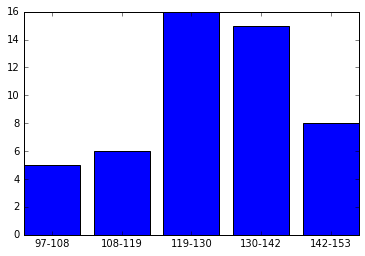

In [5]:
histplot(Weight)

## Height vs Weight

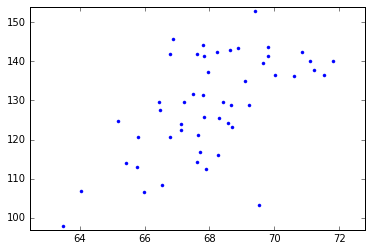

In [6]:
scatterplot(Height, Weight)

## Barchart

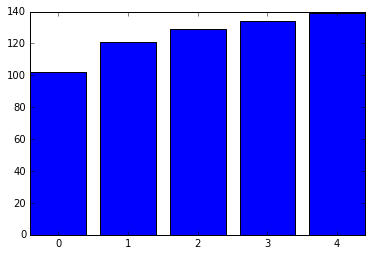

In [7]:
barchart(Height, Weight)

## Wages

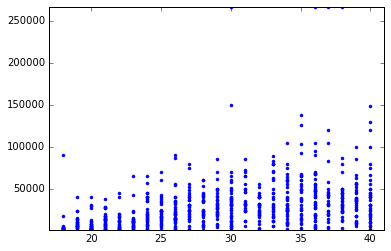

In [11]:
# %load wages.py

#Write a line of code to print a scatterplot of Age on the horizontal axis 
#against Wage on the vertical axis

from plotting import *

Age=[25, 26, 33, 29, 27, 21, 26, 35, 21, 37, 21, 38, 18, 19, 36, 30, 29, 24, 24, 36, 36, 27, 33, 23, 21, 26, 27, 27, 24, 26, 25, 24, 22, 25, 40, 39, 19, 31, 33, 30, 33, 27, 40, 32, 31, 35, 26, 34, 27, 34, 33, 20, 19, 40, 39, 39, 37, 18, 35, 20, 28, 31, 30, 29, 31, 18, 40, 20, 32, 20, 34, 34, 25, 29, 40, 40, 39, 36, 39, 34, 34, 35, 39, 38, 33, 32, 21, 29, 36, 33, 30, 39, 21, 19, 38, 30, 40, 36, 34, 28, 37, 29, 39, 25, 36, 33, 37, 19, 28, 26, 18, 22, 40, 20, 40, 20, 39, 29, 26, 26, 22, 37, 34, 29, 24, 23, 21, 19, 29, 30, 23, 40, 30, 30, 19, 39, 39, 25, 36, 38, 24, 32, 34, 33, 36, 30, 35, 26, 28, 23, 25, 23, 40, 20, 26, 26, 22, 23, 18, 36, 34, 36, 35, 40, 39, 39, 33, 22, 37, 20, 37, 35, 20, 23, 37, 32, 25, 35, 35, 22, 21, 31, 40, 26, 24, 29, 37, 19, 33, 31, 29, 27, 21, 19, 39, 34, 34, 40, 26, 39, 35, 31, 35, 24, 19, 27, 27, 20, 28, 30, 23, 21, 20, 26, 31, 24, 25, 25, 22, 32, 28, 36, 21, 38, 18, 25, 21, 33, 40, 19, 38, 33, 37, 32, 31, 31, 38, 19, 37, 37, 32, 36, 34, 35, 35, 35, 37, 35, 39, 34, 24, 25, 18, 40, 33, 32, 23, 25, 19, 39, 38, 36, 32, 27, 22, 40, 28, 29, 25, 36, 26, 28, 32, 34, 34, 21, 21, 32, 19, 35, 30, 35, 26, 31, 38, 34, 33, 35, 37, 38, 36, 40, 22, 30, 28, 28, 29, 36, 24, 28, 28, 28, 26, 21, 35, 22, 32, 28, 19, 33, 18, 22, 36, 26, 19, 26, 30, 27, 28, 24, 36, 37, 20, 32, 38, 39, 38, 30, 32, 30, 26, 23, 19, 29, 33, 34, 23, 30, 32, 40, 36, 29, 39, 34, 34, 22, 22, 22, 36, 38, 38, 30, 26, 40, 34, 21, 34, 38, 32, 35, 35, 26, 28, 20, 40, 23, 24, 26, 24, 39, 21, 33, 31, 39, 39, 20, 22, 18, 23, 36, 32, 37, 36, 26, 30, 30, 30, 21, 22, 40, 38, 22, 27, 23, 21, 22, 20, 30, 31, 40, 19, 32, 24, 21, 27, 32, 30, 34, 18, 25, 22, 40, 23, 19, 24, 24, 25, 40, 27, 29, 22, 39, 38, 34, 39, 30, 31, 33, 34, 25, 20, 20, 20, 20, 24, 19, 21, 31, 31, 29, 38, 39, 33, 40, 24, 38, 37, 18, 24, 38, 38, 22, 40, 21, 36, 30, 21, 30, 35, 20, 25, 25, 29, 30, 20, 29, 29, 31, 20, 26, 26, 38, 37, 39, 31, 35, 36, 30, 38, 36, 23, 39, 39, 20, 30, 34, 21, 23, 21, 33, 30, 33, 32, 36, 18, 31, 32, 25, 23, 23, 21, 34, 18, 40, 21, 29, 29, 21, 38, 35, 38, 32, 38, 27, 23, 33, 29, 19, 20, 35, 29, 27, 28, 20, 40, 35, 40, 40, 20, 36, 38, 28, 30, 30, 36, 29, 27, 25, 33, 19, 27, 28, 34, 36, 27, 40, 38, 37, 31, 33, 38, 36, 25, 23, 22, 23, 34, 26, 24, 28, 32, 22, 18, 29, 19, 21, 27, 28, 35, 30, 40, 28, 37, 34, 24, 40, 33, 29, 30, 36, 25, 26, 26, 28, 34, 39, 34, 26, 24, 33, 38, 37, 36, 34, 37, 33, 25, 27, 30, 26, 21, 40, 26, 25, 25, 40, 28, 35, 36, 39, 33, 36, 40, 32, 36, 26, 24, 36, 27, 28, 26, 37, 36, 37, 36, 20, 34, 30, 32, 40, 20, 31, 23, 27, 19, 24, 23, 24, 25, 36, 26, 33, 30, 27, 26, 28, 28, 21, 31, 24, 27, 24, 29, 29, 28, 22, 20, 23, 35, 30, 37, 31, 31, 21, 32, 29, 27, 27, 30, 39, 34, 23, 35, 39, 27, 40, 28, 36, 35, 38, 21, 18, 21, 38, 37, 24, 21, 25, 35, 27, 35, 24, 36, 32, 20]

Wage=[17000, 13000, 28000, 45000, 28000, 1200, 15500, 26400, 14000, 35000, 16400, 50000, 2600, 9000, 27000, 150000, 32000, 22000, 65000, 56000, 6500, 30000, 70000, 9000, 6000, 34000, 40000, 30000, 6400, 87000, 20000, 45000, 4800, 34000, 75000, 26000, 4000, 50000, 63000, 14700, 45000, 42000, 10000, 40000, 70000, 14000, 54000, 14000, 23000, 24400, 27900, 4700, 8000, 19000, 17300, 45000, 3900, 2900, 138000, 2100, 60000, 55000, 45000, 40000, 45700, 90000, 40000, 13000, 30000, 2000, 75000, 60000, 70000, 41000, 42000, 31000, 39000, 104000, 52000, 20000, 59000, 66000, 63000, 32000, 11000, 16000, 6400, 17000, 47700, 5000, 25000, 35000, 20000, 14000, 29000, 267000, 31000, 27000, 64000, 39600, 267000, 7100, 33000, 31500, 40000, 23000, 3000, 14000, 44000, 15100, 2600, 6200, 50000, 3000, 25000, 2000, 38000, 22000, 20000, 2500, 1500, 42000, 30000, 27000, 7000, 11900, 27000, 24000, 4300, 30200, 2500, 30000, 70000, 38700, 8000, 36000, 66000, 24000, 95000, 39000, 20000, 23000, 56000, 25200, 62000, 12000, 13000, 35000, 35000, 14000, 24000, 12000, 14000, 31000, 40000, 22900, 12000, 14000, 1600, 12000, 80000, 90000, 126000, 1600, 100000, 8000, 71000, 40000, 42000, 40000, 120000, 35000, 1200, 4000, 32000, 8000, 14500, 65000, 15000, 3000, 2000, 23900, 1000, 22000, 18200, 8000, 30000, 23000, 30000, 27000, 70000, 40000, 18000, 3100, 57000, 25000, 32000, 10000, 4000, 49000, 93000, 35000, 49000, 40000, 5500, 30000, 25000, 5700, 6000, 30000, 42900, 8000, 5300, 90000, 85000, 15000, 17000, 5600, 11500, 52000, 1000, 42000, 2100, 50000, 1500, 40000, 28000, 5300, 149000, 3200, 12000, 83000, 45000, 31200, 25000, 72000, 70000, 7000, 23000, 40000, 40000, 28000, 10000, 48000, 20000, 60000, 19000, 25000, 39000, 68000, 2300, 23900, 5000, 16300, 80000, 45000, 12000, 9000, 1300, 35000, 35000, 47000, 32000, 18000, 20000, 20000, 23400, 48000, 8000, 5200, 33500, 22000, 22000, 52000, 104000, 28000, 13000, 12000, 15000, 53000, 27000, 50000, 13900, 23000, 28100, 23000, 12000, 55000, 83000, 31000, 33200, 45000, 3000, 18000, 11000, 41000, 36000, 33600, 38000, 45000, 53000, 24000, 3000, 37500, 7700, 4800, 29000, 6600, 12400, 20000, 2000, 1100, 55000, 13400, 10000, 6000, 6000, 16000, 19000, 8300, 52000, 58000, 27000, 25000, 80000, 10000, 22000, 18000, 21000, 8000, 15200, 15000, 5000, 50000, 89000, 7000, 65000, 58000, 42000, 55000, 40000, 14000, 36000, 30000, 7900, 6000, 1200, 10000, 54000, 12800, 35000, 34000, 40000, 45000, 9600, 3300, 39000, 22000, 40000, 68000, 24400, 1000, 10800, 8400, 50000, 22000, 20000, 20000, 1300, 9000, 14200, 32000, 65000, 18000, 18000, 3000, 16700, 1500, 1400, 15000, 55000, 42000, 70000, 35000, 21600, 5800, 35000, 5700, 1700, 40000, 40000, 45000, 25000, 13000, 6400, 11000, 4200, 30000, 32000, 120000, 10000, 19000, 12000, 13000, 37000, 40000, 38000, 60000, 3100, 16000, 18000, 130000, 5000, 5000, 35000, 1000, 14300, 100000, 20000, 33000, 8000, 9400, 87000, 2500, 12000, 12000, 33000, 16500, 25500, 7200, 2300, 3100, 2100, 3200, 45000, 40000, 3800, 30000, 12000, 62000, 45000, 46000, 50000, 40000, 13000, 50000, 23000, 4000, 40000, 25000, 16000, 3000, 80000, 27000, 68000, 3500, 1300, 10000, 46000, 5800, 24000, 12500, 50000, 48000, 29000, 19000, 26000, 30000, 10000, 10000, 20000, 43000, 105000, 55000, 5000, 65000, 68000, 38000, 47000, 48700, 6100, 55000, 30000, 5000, 3500, 23400, 11400, 7000, 1300, 80000, 65000, 45000, 19000, 3000, 17100, 22900, 31200, 35000, 3000, 5000, 1000, 36000, 4800, 60000, 9800, 30000, 85000, 18000, 24000, 60000, 30000, 2000, 39000, 12000, 10500, 60000, 36000, 10500, 3600, 1200, 28600, 48000, 20800, 5400, 9600, 30000, 30000, 20000, 6700, 30000, 3200, 42000, 37000, 5000, 18000, 20000, 14000, 12000, 18000, 3000, 13500, 35000, 38000, 30000, 36000, 66000, 45000, 32000, 46000, 80000, 27000, 4000, 21000, 7600, 16000, 10300, 27000, 19000, 14000, 19000, 3100, 20000, 2700, 27000, 7000, 13600, 75000, 35000, 36000, 25000, 6000, 36000, 50000, 46000, 3000, 37000, 40000, 30000, 48800, 19700, 16000, 14000, 12000, 25000, 25000, 28600, 17000, 31200, 57000, 23000, 23500, 46000, 18700, 26700, 9900, 16000, 3000, 52000, 51000, 14000, 14400, 27000, 26000, 60000, 25000, 6000, 20000, 3000, 69000, 24800, 12000, 3100, 18000, 20000, 267000, 28000, 9800, 18200, 80000, 6800, 21100, 20000, 68000, 20000, 45000, 8000, 40000, 31900, 28000, 24000, 2000, 32000, 11000, 20000, 5900, 16100, 23900, 40000, 37500, 11000, 55000, 37500, 60000, 23000, 9500, 34500, 4000, 9000, 11200, 35200, 30000, 18000, 21800, 19700, 16700, 12500, 11300, 4000, 39000, 32000, 14000, 65000, 50000, 2000, 30400, 22000, 1600, 56000, 40000, 85000, 9000, 10000, 19000, 5300, 5200, 43000, 60000, 50000, 38000, 267000, 15600, 1800, 17000, 45000, 31000, 5000, 8000, 43000, 103000, 45000, 8800, 26000, 47000, 40000, 8000]

#Insert your code on the next line
scatterplot(Age, Wage)

## Wage Barchart

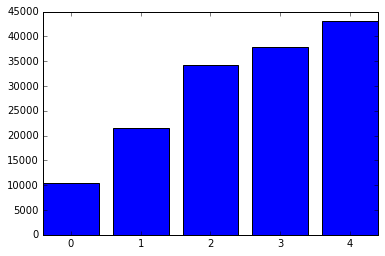

In [12]:
barchart(Age, Wage)

## Most Common Age

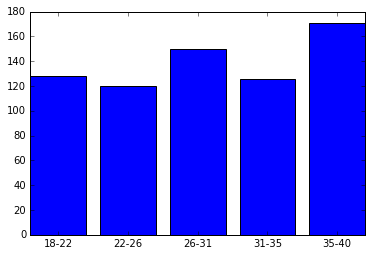

In [13]:
histplot(Age)